In [1]:
import h5py
import numpy as np
import scipy.io
from keras.utils.io_utils import HDF5Matrix
import matplotlib.pyplot as plt
from PIL import Image as im

E:\program\Anaconda3\envs\tensorflow_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import h5py
#load data from NYU Depth V2
#Dataset = scipy.io.loadmat('nyu_depth_v2_labeled')
#splits = scipy.io.loadmat('splits')
f = h5py.File('nyu_depth_v2_labeled.mat', 'r')
#f = h5py.File('splits.mat', 'r')
#print(f.items())
for k, v in f.items():
    print(k,'      ',v)

#refs#        <HDF5 group "/#refs#" (8484 members)>
#subsystem#        <HDF5 group "/#subsystem#" (1 members)>
accelData        <HDF5 dataset "accelData": shape (4, 1449), type "<f4">
depths        <HDF5 dataset "depths": shape (1449, 640, 480), type "<f4">
images        <HDF5 dataset "images": shape (1449, 3, 640, 480), type "|u1">
instances        <HDF5 dataset "instances": shape (1449, 640, 480), type "|u1">
labels        <HDF5 dataset "labels": shape (1449, 640, 480), type "<u2">
names        <HDF5 dataset "names": shape (1, 894), type "|O">
namesToIds        <HDF5 dataset "namesToIds": shape (1, 6), type "<u4">
rawDepthFilenames        <HDF5 dataset "rawDepthFilenames": shape (1, 1449), type "|O">
rawDepths        <HDF5 dataset "rawDepths": shape (1449, 640, 480), type "<f4">
rawRgbFilenames        <HDF5 dataset "rawRgbFilenames": shape (1, 1449), type "|O">
sceneTypes        <HDF5 dataset "sceneTypes": shape (1, 1449), type "|O">
scenes        <HDF5 dataset "scenes": shape (1, 14

In [3]:
set_l = f['labels']

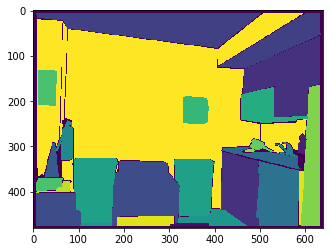

In [6]:
plt.imshow(set_l[0].T)

In [5]:
import cv2

In [8]:
cv2.imwrite('test.jpg',set_l[0].T)

True

## depth map

In [17]:
dset_image0 = f['images']
dset_depth0 = f['depths']
dset_seg0 = f['labels']

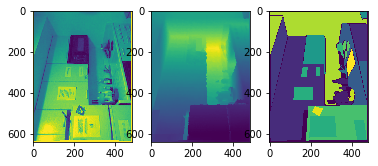

In [15]:
plt.figure(1)
plt.subplot(131)
plt.imshow(dset_image0[1][0])

plt.subplot(132)
plt.imshow(dset_depth0[1])

plt.subplot(133)
plt.imshow(dset_seg0[1])
plt.show()

In [16]:
print(dset_image0.shape,dset_image0.dtype, type(dset_image0), dset_depth0.shape)

(1449, 3, 640, 480) uint8 <class 'h5py._hl.dataset.Dataset'> (1449, 640, 480)


In [22]:
def exchange(X):
    nX = np.reshape(X, (X.shape[0], 640,480,3))
    for i in range(len(X)):
        for j in range(3):
            nX[i][:,:,j] = X[i][j,:,:]
    return nX

In [6]:
def resize_set(dset,width = 320,height = 240,n =3):
    new = np.zeros([len(dset),width,height,n],dtype=np.uint8)
    for i in range(len(dset)):
        img = dset[i].reshape(640,480,n)
        img = im.fromarray(img.astype('uint8'))
        img = img.resize([height,width], im.ANTIALIAS)
        new[i] = img
    return new

In [53]:
dset_image = exchange(dset_image0)
dset_image = resize_set(dset_image)

In [50]:
def resize_testset(dset,width = 320,height = 240,n = 10):
    new = np.zeros([len(dset),width,height],dtype=np.uint8)
    for i in range(len(dset)):
        img = (dset[i]*(255/n)).reshape(640,480)
        img = im.fromarray(img.astype('uint8'))
        img = img.resize([height,width],im.ANTIALIAS)
        new[i] = img
    return new

In [46]:
dset_depth = resize_testset(dset_depth0)
dset_depth.shape

(1449, 320, 240)

In [51]:
dset_seg = resize_testset(dset_seg0,320,240,255)
dset_seg.shape

(1449, 320, 240)

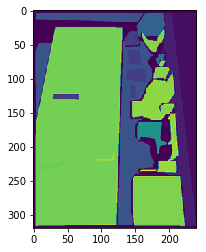

In [52]:
plt.imshow(dset_seg[10])

In [54]:
with h5py.File("resized.mat", "w") as f2:
    dset2 = f2.create_dataset("images", data=dset_image)
    dset3 = f2.create_dataset("depths", data=dset_depth)
    dset4 = f2.create_dataset("labels", data=dset_seg)

In [28]:
f2 = h5py.File("resized.mat", "r")
#f = h5py.File('splits.mat', 'r')
#print(f.items())
for k, v in f2.items():
    print(k,'      ',v)
f2.close()

depths        <HDF5 dataset "depths": shape (1449, 320, 240), type "|u1">
images        <HDF5 dataset "images": shape (1449, 320, 240, 3), type "|u1">
labels        <HDF5 dataset "labels": shape (1449, 320, 240), type "|u1">


In [21]:
dset_image1 = exchange(dset_image0)

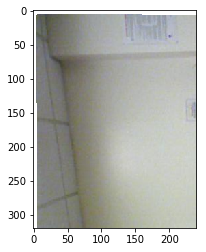

In [22]:
img = dset_image1[0][0:320,0:240,:]
plt.imshow(img)

In [9]:
def crop_set(dset, dim=3):
    if dim ==3:
        new = np.zeros([4*len(dset),320,240,dim],dtype=np.uint8)
    if dim ==1 :
        new = np.zeros([4*len(dset),320,240],dtype=np.uint8)
    for i in range(len(dset)):
        img = dset[i]
        if dim == 3:
            new[4*i] = img[0:320,0:240,:]
            new[4*i+1] = img[320:640,0:240,:]
            new[4*i+2] = img[0:320,240:480,:]
            new[4*i+3] = img[320:640,240:480,:]
        else:
            new[4*i] = img[0:320,0:240]
            new[4*i+1] = img[320:640,0:240]
            new[4*i+2] = img[0:320,240:480]
            new[4*i+3] = img[320:640,240:480]
    return new

In [18]:
def crop_set_ex(dset, dim=3):
    if dim ==3:
        new = np.zeros([4*len(dset),400,400,dim],dtype=np.uint8)
    if dim ==1 :
        new = np.zeros([4*len(dset),400,400],dtype=np.uint8)
    for i in range(len(dset)):
        img = dset[i]
        if dim == 3:
            new[4*i] = img[0:400,0:400,:]
            new[4*i+1] = img[240:640,0:400,:]
            new[4*i+2] = img[0:400,80:480,:]
            new[4*i+3] = img[240:640,80:480,:]
        else:
            new[4*i] = img[0:400,0:400]
            new[4*i+1] = img[240:640,0:400]
            new[4*i+2] = img[0:400,80:480]
            new[4*i+3] = img[240:640,80:480]
    return new

In [19]:
def resize_set(dset,width = 224,height =224,n =3):
    new = np.zeros([len(dset),width,height,n],dtype=np.uint8)
    for i in range(len(dset)):
        img = dset[i].reshape(400,400,n)
        img = im.fromarray(img.astype('uint8'))
        img = img.resize([height,width], im.ANTIALIAS)
        new[i] = img
    return new

In [20]:
def resize_testset(dset,width = 112,height = 112):
    new = np.zeros([len(dset),width,height],dtype=np.uint8)
    for i in range(len(dset)):
        img = (dset[i]*(255/10)).reshape(400,400)
        img = im.fromarray(img.astype('uint8'))
        img = img.resize([height,width],im.ANTIALIAS)
        new[i] = img
    return new

In [23]:
dset_image1 = exchange(dset_image0)
dset_crop_image = crop_set_ex(dset_image1)
#dset_crop_depth = crop_set_ex(dset_depth0,1)
dset_crop_seg = crop_set_ex(dset_seg0,1)

In [11]:
dset_image = resize_set(dset_crop_image)
dset_depth = resize_testset(dset_crop_depth)
dset_seg = resize_testset(dset_crop_seg)

In [12]:
print(dset_image.shape,dset_depth.shape,dset_seg.shape)

(5796, 224, 224, 3) (5796, 112, 112) (5796, 112, 112)


In [ ]:
with h5py.File("croped_seg.mat", "w") as f2:
    dset2 = f2.create_dataset("images", data=dset_image)
    dset3 = f2.create_dataset("depths", data=dset_depth)
    dset4 = f2.create_dataset("labels", data=dset_seg)

In [24]:
with h5py.File("croped_seg_org.mat", "w") as f2:
    dset2 = f2.create_dataset("images", data=dset_crop_image)
    dset4 = f2.create_dataset("labels", data=dset_crop_seg)

In [25]:
f2 = h5py.File("croped_seg_org.mat", "r")
#f = h5py.File('splits.mat', 'r')
#print(f.items())
for k, v in f2.items():
    print(k,'      ',v)
f2.close()

images        <HDF5 dataset "images": shape (5796, 400, 400, 3), type "|u1">
labels        <HDF5 dataset "labels": shape (5796, 400, 400), type "|u1">
